## Exploratory Data Analysis


In [94]:
import pandas as pd
import numpy as np

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:

df = pd.read_csv('df_eda.csv')
df_random = pd.read_csv('clean_random_150k.csv')
df_fuel_consumption = pd.read_csv('complete_fuel_consumption.csv')

In [97]:
df_passenger4000 = pd.read_csv('/Users/shubhangitak/Downloads/passenger4000.csv')

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

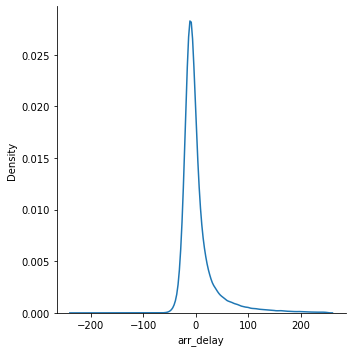

In [24]:
sns.displot(df_random, x="arr_delay",kind='kde')
plt.show()

/Users/shubhangitak/Desktop/LHL/Anaconda/anaconda3/envs/ONE/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


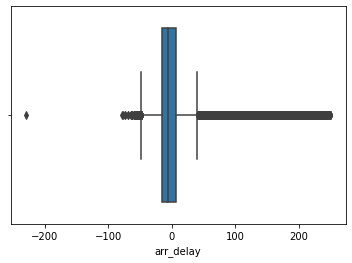

In [25]:
sns.boxplot(df_random['arr_delay']);
plt.show();

In [26]:
df_removed_outliers = df_random.drop(df_random[(df_random['arr_delay']<-100)].index)

# reset index
df_removed_outliers = df_removed_outliers.reset_index(drop=True)

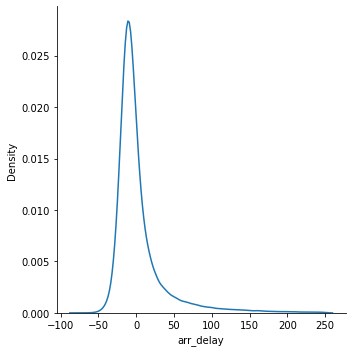

In [27]:
sns.displot(df_removed_outliers, x="arr_delay",kind='kde')
plt.show()

/Users/shubhangitak/Desktop/LHL/Anaconda/anaconda3/envs/ONE/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


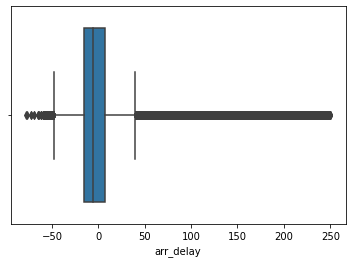

In [28]:
sns.boxplot(df_removed_outliers['arr_delay']);
plt.show();

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [30]:
df_delay_positive=df_removed_outliers[(df_removed_outliers['dep_delay']>0) &(df_removed_outliers['arr_delay']>0)]

In [31]:
df_delay_positive.columns

Index(['taxi_in', 'dest_state_new', 'taxi_out', 'dep_delay', 'dup', 'dest_new',
       'fl_date', 'late_aircraft_delay', 'longest_add_gtime', 'month',
       'arr_hrs_catg', 'dest_city', 'arr_hrs_catg_new', 'crs_arr_hrs', 'dest',
       'carrier_delay', 'year', 'actual_elapsed_time', 'arr_delay', 'date',
       'dest_airport_id', 'dest_state', 'wheels_off', 'cancellation_code',
       'diverted', 'flights', 'origin_city', 'no_name', 'origin_city_new',
       'crs_dep_hrs', 'branded_code_share', 'mkt_carrier_fl_num',
       'total_add_gtime', 'origin_state_new', 'mkt_unique_carrier_new',
       'distance_catg_new', 'dep_time', 'month_new', 'mkt_carrier',
       'origin_airport_id', 'dep_hrs_catg', 'dest_city_name', 'distance',
       'dep_hrs_catg_new', 'air_time', 'crs_arr_time', 'arr_time', 'cancelled',
       'security_delay', 'dest_city_new', 'origin', 'first_dep_time',
       'op_carrier_fl_num', 'op_unique_carrier', 'crs_elapsed_time',
       'origin_new', 'distance_catg', 'origin

In [32]:
df_delay_positives=df_delay_positive[['dep_delay','arr_delay']].groupby(by=df_delay_positive['month']).mean()

In [33]:
df_delay_positives.reset_index(inplace=True)

In [34]:
df_delay_positives

,month,dep_delay,arr_delay
0,Apr,44.286941,42.791055
1,Aug,48.295058,48.152326
2,Dec,42.729637,41.797932
3,Feb,43.741850,43.132297
4,Jan,46.720151,45.743503
5,Jul,48.900170,47.450369
6,Jun,47.250549,46.640505
7,Mar,41.034290,38.883485
8,May,45.469850,44.724212
9,Nov,39.654361,38.559537


<AxesSubplot:xlabel='month'>

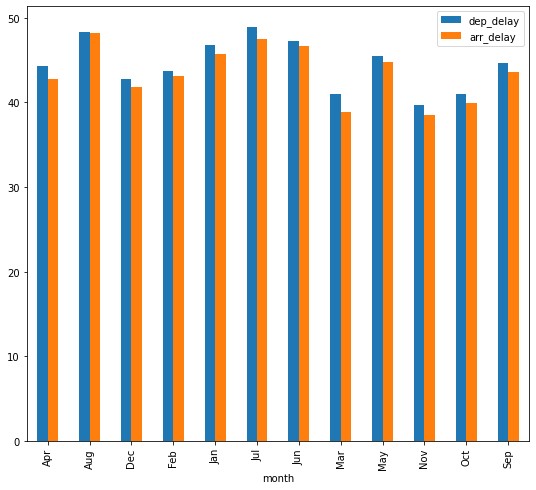

In [35]:
df_delay_positives.plot(x='month', y=['dep_delay', 'arr_delay'], kind="bar", figsize=(9, 8))

In [36]:
median_monthly_delay=df_random[['dep_delay','carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']].groupby(by=df_random['month']).mean()

In [37]:
median_monthly_delay.reset_index(inplace=True)

<AxesSubplot:xlabel='month'>

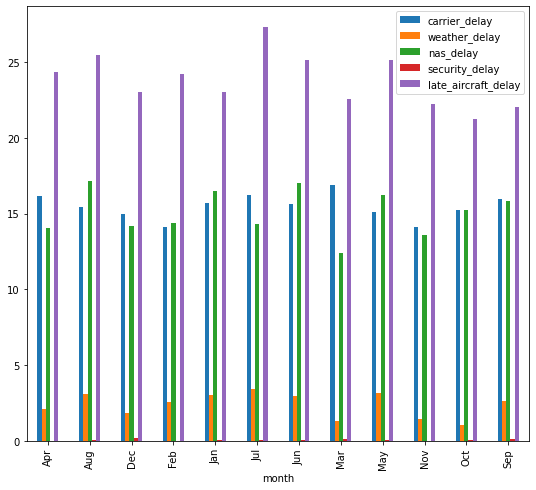

In [38]:
median_monthly_delay.plot(x='month', y=['carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'], kind="bar", figsize=(9, 8))

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [18]:

data = df_removed_outliers[['taxi_in','dep_hrs_catg','taxi_out']]


(-0.5, 3.5, 0.0, 40.0)

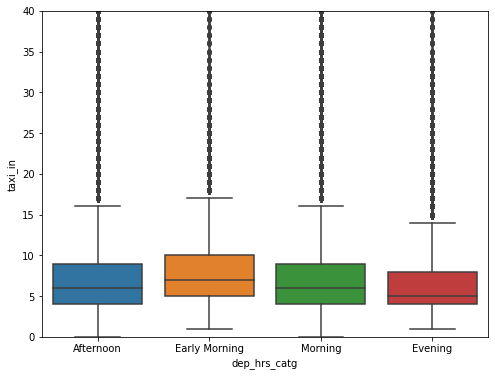

In [193]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='dep_hrs_catg', y="taxi_in", data=data)
fig.axis(ymin=0, ymax=40)

(-0.5, 3.5, 0.0, 100.0)

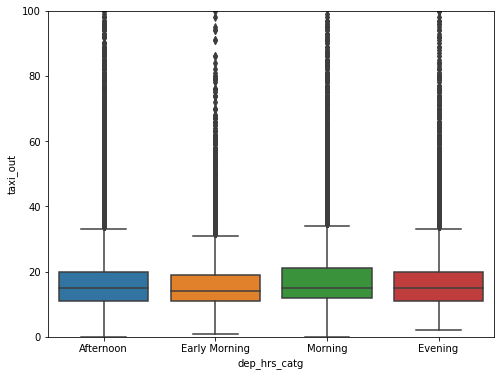

In [43]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='dep_hrs_catg', y="taxi_out", data=data)
fig.axis(ymin=0, ymax=100)

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [167]:
# filter arr delays(dep_delay >0)
fil_df = df_random[(df_random['arr_delay'] > 0)&(df_random['dep_delay']>0)]
fil_df.shape


(35829, 66)

[Text(0.5, 0, 'dep_delay'),
 Text(1.5, 0, 'carrier_delay'),
 Text(2.5, 0, 'weather_delay'),
 Text(3.5, 0, 'nas_delay'),
 Text(4.5, 0, 'security_delay'),
 Text(5.5, 0, 'late_aircraft_delay')]

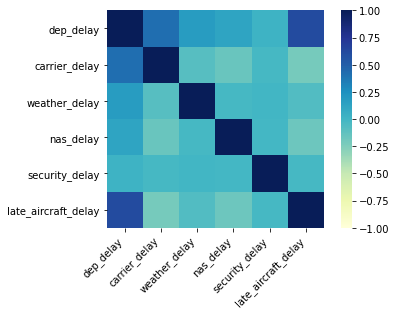

In [168]:
# check if dep delay and arrival delay have any correlation
df_dep = fil_df[['dep_delay', 'arr_delay']]

corr_col = fil_df[['dep_delay', 'carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']]
ax = sns.heatmap(corr_col.corr(), vmin=-1, vmax=1, center=0,
    cmap='YlGnBu',
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

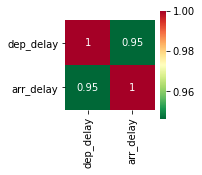

In [169]:
# Checking corr between arr and dep delay (Scatter plot can be tried!!)
# Adding corr coeff wrt every variable

corr_col = fil_df[['dep_delay', 'arr_delay']]
                   #'carrier_delay','weather_delay','nas_delay','late_aircraft_delay']]

plt.figure(figsize=(2,2))
g = sns.heatmap(corr_col.corr(),annot=True,cmap="RdYlGn_r", square = True)

In [170]:
#  dep_delay occured due to arr_delay 
#filtering arr_delay >0 and count total as well as dep_delay

total_arr_delay = df_random[df_random['arr_delay']>0] 
print(total_arr_delay.shape[0]) #count total arrival delays

dep_if_arr_delay = total_arr_delay[total_arr_delay['dep_delay'] >0]
print(dep_if_arr_delay.shape[0])  #count dep delay if there is a arrival delay

50700
35829


In [171]:
# average percentage of delays that is already created before departure
avg_delay_already = (dep_if_arr_delay.shape[0])/(total_arr_delay.shape[0]+dep_if_arr_delay.shape[0])
avg_delay_already*100

41.4069271573692

In [172]:
#  checking if airlines where able to arrive on time even after dep_delay

#filtering dep_delay >0 and count total as well as arr_delay<=0

total_dep_delay = df_random[df_random['dep_delay']>0] 
print(total_dep_delay.shape[0]) #count total departure delays

arrnot_if_dep_delay = total_dep_delay[total_dep_delay['arr_delay'] <=0]
print(arrnot_if_dep_delay.shape[0])  #count arr on/before time if there is a departure delay

49140
13079


In [173]:
# average percentage of arrival on/before time even after late departure
avg_arr_early = (arrnot_if_dep_delay.shape[0])/(total_dep_delay.shape[0]+arrnot_if_dep_delay.shape[0])
avg_arr_early*100

21.020910011411306

#### **Task 6**: How many states cover 50% of US air traffic? 

In [174]:
states_eda = df_random[['flights', 'origin_state', 'dest_state']]
states_eda

,flights,origin_state,dest_state
0,1,CA,GA
1,1,MA,MN
2,1,TX,MN
3,1,LA,GA
4,1,CO,NM
...,...,...,...
148530,1,PA,MA
148531,1,NJ,NC
148532,1,IL,MI
148533,1,AZ,CA


In [175]:
# count of origin states
org_state_count = states_eda.groupby(by = 'origin_state').count().sort_values(by = 'flights', ascending=False)
org_state_count.head()

,flights,dest_state
origin_state,,
CA,16139,16139
TX,14822,14822
FL,10859,10859
IL,9501,9501
GA,7606,7606


In [176]:
# delete unwanted column
del org_state_count['flights']
#rename column name
org_state_count.rename(columns={'dest_state':'origin_flights'}, inplace=True)
org_state_count.head()

,origin_flights
origin_state,
CA,16139
TX,14822
FL,10859
IL,9501
GA,7606


In [177]:
# count of dest states
dest_state_count = states_eda.groupby(by = 'dest_state').count().sort_values(by = 'flights', ascending=False)

#checking number of states
#print(dest_state_count.shape)

# delete unwanted column
del dest_state_count['flights']
#rename column name
dest_state_count.rename(columns={'origin_state':'dest_flights'}, inplace=True)
dest_state_count.head()

,dest_flights
dest_state,
CA,16148
TX,14736
FL,10747
IL,9340
GA,7840


In [179]:
# join dataframes on common states index
state_df = dest_state_count.join(org_state_count)

#fill nan value with zero
state_df['dest_flights'] = state_df['dest_flights'].fillna(0)
state_df['origin_flights'] = state_df['origin_flights'].fillna(0)

# sum outbound and inbound
state_df['tot_flights'] = state_df['dest_flights']+state_df['origin_flights']

# sort in descending order
state_df.sort_values('tot_flights', ascending = False)

# cumulative sum of total flights
state_df['cum_tot'] = state_df.tot_flights.cumsum()

# stop at the state/row where cumulative sum is 50% of tot flights
# 50% of 297070.0
tot_50percent = 297070/2  # 148535
state_df.head(7)

# reset index
state_df.reset_index(inplace=True)



In [198]:
state_df.tot_flights.sum()

297070

<AxesSubplot:xlabel='dest_state'>

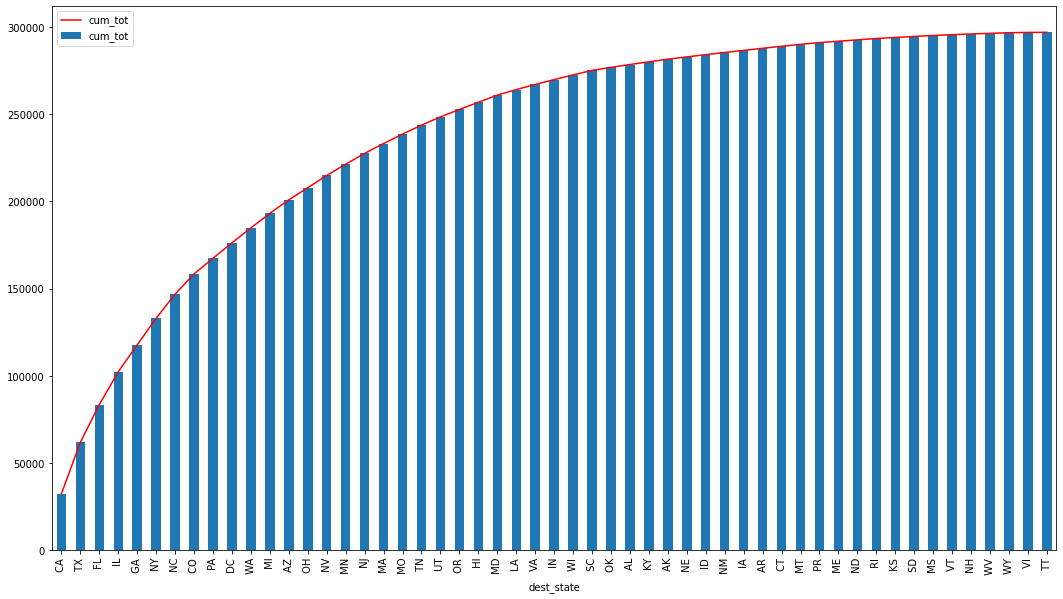

In [180]:
ax = state_df[['dest_state','cum_tot']].plot(x='dest_state',linestyle='-', color='Red', figsize=(18,10))
state_df[['dest_state','cum_tot']].plot(x='dest_state', kind='bar', ax=ax)

<AxesSubplot:xlabel='dest_state'>

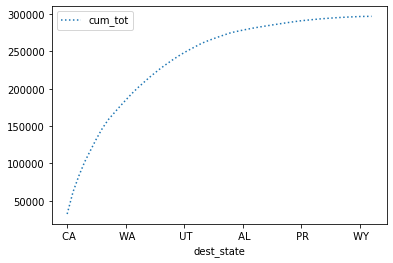

In [181]:
state_df[['dest_state','cum_tot']].plot(x='dest_state', linestyle='dotted')

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [185]:
distance_eda = pd.DataFrame(
    df_random.groupby(df_random['month']).count().reset_index())

In [186]:
distance_eda

,month,taxi_in,dest_state_new,taxi_out,dep_delay,dup,dest_new,fl_date,late_aircraft_delay,longest_add_gtime,...,distance_catg,origin_state,crs_elapsed_hrs,weather_delay,tail_num,nas_delay,crs_dep_time,origin_city_name,wheels_on,mkt_unique_carrier
0,Apr,12216,12439,12223,12232,12439,12439,12439,2122,64,...,12439,12439,12439,2122,12406,2122,12439,12439,12216,12439
1,Aug,12848,13096,12854,12861,13096,13096,13096,2743,77,...,13096,13096,13096,2743,13074,2743,13096,13096,12848,13096
2,Dec,12283,12425,12290,12294,12425,12425,12425,2487,77,...,12425,12425,12425,2487,12405,2487,12425,12425,12283,12425
3,Feb,10331,10634,10344,10355,10634,10634,10634,2112,66,...,10634,10634,10634,2112,10586,2112,10634,10634,10331,10634
4,Jan,11359,11547,11363,11363,11547,11547,11547,2125,71,...,11547,11547,11547,2125,11496,2125,11547,11547,11359,11547
5,Jul,12893,13150,12900,12914,13150,13150,13150,2757,95,...,13150,13150,13150,2757,13118,2757,13150,13150,12893,13150
6,Jun,12614,12850,12622,12635,12850,12850,12850,2830,104,...,12850,12850,12850,2830,12805,2830,12850,12850,12614,12850
7,Mar,12161,12474,12167,12176,12474,12474,12474,2073,68,...,12474,12474,12474,2073,12390,2073,12474,12474,12161,12474
8,May,12652,12909,12659,12679,12909,12909,12909,2443,94,...,12909,12909,12909,2443,12872,2443,12909,12909,12652,12909
9,Nov,12110,12244,12114,12118,12244,12244,12244,2082,58,...,12244,12244,12244,2082,12218,2082,12244,12244,12110,12244


#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [114]:
fl = pd.DataFrame(
    df_random.groupby(df_random['origin']).count().reset_index())

In [116]:
fl.columns

Index(['origin', 'taxi_in', 'dest_state_new', 'taxi_out', 'dep_delay', 'dup',
       'dest_new', 'fl_date', 'late_aircraft_delay', 'longest_add_gtime',
       'month', 'arr_hrs_catg', 'dest_city', 'arr_hrs_catg_new', 'crs_arr_hrs',
       'dest', 'carrier_delay', 'year', 'actual_elapsed_time', 'arr_delay',
       'date', 'dest_airport_id', 'dest_state', 'wheels_off',
       'cancellation_code', 'diverted', 'flights', 'origin_city', 'no_name',
       'origin_city_new', 'crs_dep_hrs', 'branded_code_share',
       'mkt_carrier_fl_num', 'total_add_gtime', 'origin_state_new',
       'mkt_unique_carrier_new', 'distance_catg_new', 'dep_time', 'month_new',
       'mkt_carrier', 'origin_airport_id', 'dep_hrs_catg', 'dest_city_name',
       'distance', 'dep_hrs_catg_new', 'air_time', 'crs_arr_time', 'arr_time',
       'cancelled', 'security_delay', 'dest_city_new', 'first_dep_time',
       'op_carrier_fl_num', 'op_unique_carrier', 'crs_elapsed_time',
       'origin_new', 'distance_catg', 'origin

In [117]:
flights_num = fl.sort_values(by='flights', ascending=False)[:10]

In [118]:
flights_num

,origin,taxi_in,dest_state_new,taxi_out,dep_delay,dup,dest_new,fl_date,late_aircraft_delay,longest_add_gtime,...,distance_catg,origin_state,crs_elapsed_hrs,weather_delay,tail_num,nas_delay,crs_dep_time,origin_city_name,wheels_on,mkt_unique_carrier
254,ORD,7197,7418,7205,7211,7418,7418,7418,1747,65,...,7418,7418,7418,1747,7361,1747,7418,7418,7197,7418
21,ATL,7044,7082,7046,7041,7082,7082,7082,1096,31,...,7082,7082,7082,1096,7078,1096,7082,7082,7044,7082
92,DFW,5320,5424,5323,5330,5424,5424,5424,1200,39,...,5424,5424,5424,1200,5420,1200,5424,5424,5320,5424
91,DEN,5112,5185,5116,5117,5185,5185,5185,1178,27,...,5185,5185,5185,1178,5159,1178,5185,5185,5112,5185
71,CLT,4673,4769,4678,4680,4769,4769,4769,969,28,...,4769,4769,4769,969,4753,969,4769,4769,4673,4769
193,LAX,4678,4725,4681,4682,4725,4725,4725,807,18,...,4725,4725,4725,807,4720,807,4725,4725,4678,4725
318,SEA,3474,3505,3477,3481,3505,3505,3505,599,28,...,3505,3505,3505,599,3505,599,3505,3505,3474,3505
166,IAH,3443,3475,3444,3447,3475,3475,3475,637,31,...,3475,3475,3475,637,3470,637,3475,3475,3443,3475
320,SFO,3221,3291,3222,3222,3291,3291,3291,710,15,...,3291,3291,3291,710,3287,710,3291,3291,3221,3291
269,PHX,3218,3260,3221,3221,3260,3260,3260,562,20,...,3260,3260,3260,562,3256,562,3260,3260,3218,3260


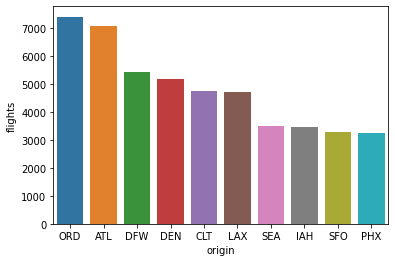

In [121]:
ax1 = sns.barplot(x='origin', y='flights', data=flights_num)

In [120]:
ax1.set(title='Origin Airport vs Flight Counts', xlabel='Origin', ylabel='Flights')

[Text(0.5, 1.0, 'Origin Airport vs Flight Counts'),
 Text(0.5, 17.200000000000003, 'Origin'),
 Text(17.200000000000003, 0.5, 'Flights')]

In [122]:
passenger_count = pd.DataFrame(
    df_passenger4000.groupby(df_passenger4000['origin']).count().reset_index())

In [124]:
passenger_num_sort = passenger_count.sort_values(by='passengers', ascending=False)[:10]

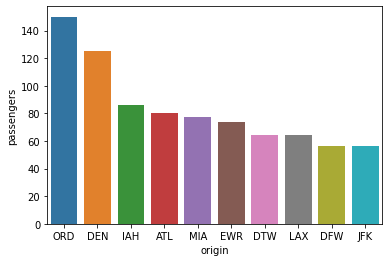

In [125]:
ax2 = sns.barplot(x='origin', y='passengers', data=passenger_num_sort)

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [98]:
df_passenger4000.columns

Index(['departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time',
       'unique_carrier', 'airline_id', 'unique_carrier_name', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_city_market_id', 'origin',
       'origin_city_name', 'origin_country', 'origin_country_name',
       'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name',
       'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type',
       'aircraft_config', 'year', 'month', 'distance_group', 'class',
       'data_source'],
      dtype='object')

In [71]:
df_passenger4000.year.value_counts()

2019    4000
Name: year, dtype: int64

In [99]:
passenger_per_month = df_passenger4000.groupby(['month']).mean()
passenger_per_month = pd.DataFrame(passenger_per_month).reset_index()


In [76]:
passenger_per_month.columns

Index(['month', 'departures_scheduled', 'departures_performed', 'payload',
       'seats', 'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp',
       'air_time', 'airline_id', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_city_market_id', 'dest_airport_id',
       'dest_city_market_id', 'aircraft_group', 'aircraft_type',
       'aircraft_config', 'year', 'distance_group'],
      dtype='object')

In [163]:
pass_carrier = df_passenger4000[['month','unique_carrier','passengers']].groupby(['unique_carrier']).sum().sort_values('passengers',ascending=False).head(10)


In [164]:
pass_carrier.reset_index(inplace=True)

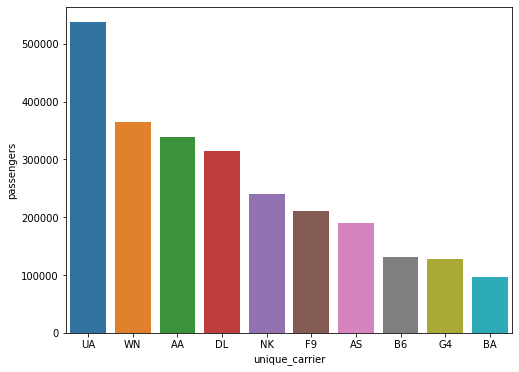

In [165]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x='unique_carrier', y="passengers", data=pass_carrier)

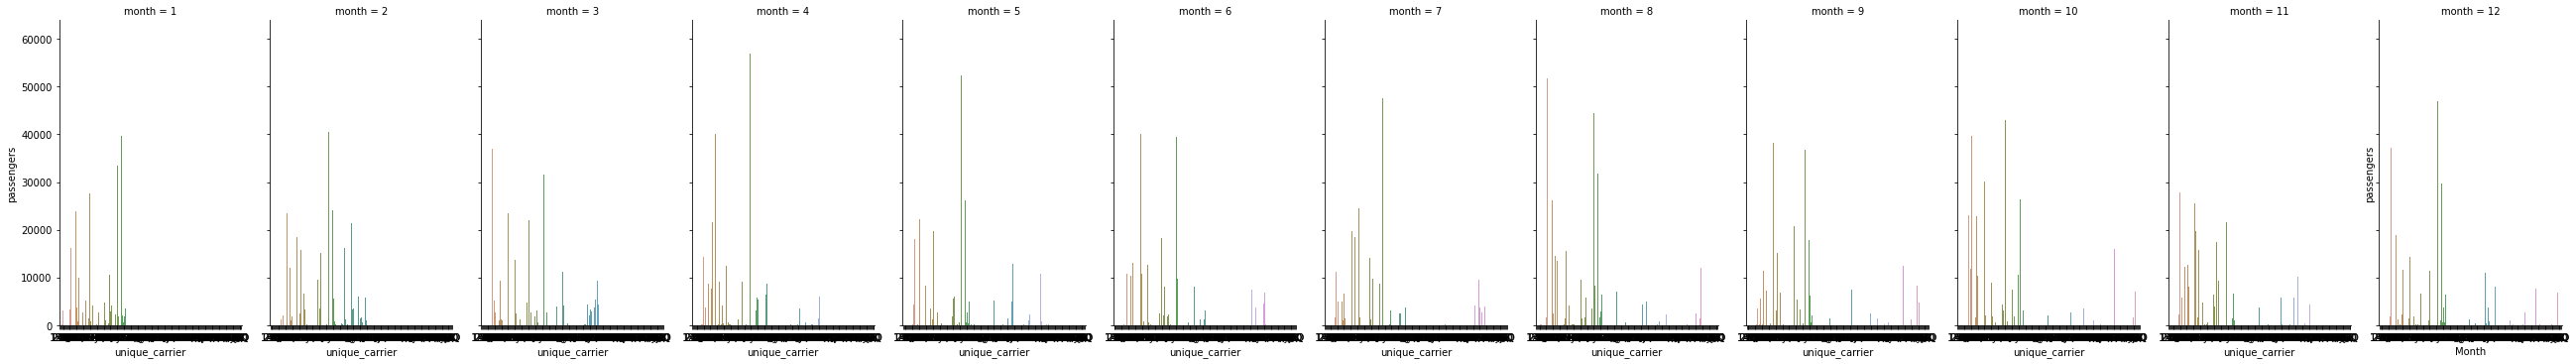

In [103]:
g= sns.catplot(x="unique_carrier", y="passengers", col="month",data=pass_carrier, saturation=.5,kind="bar", ci=None, aspect=.6)

plt.xlabel("Month")
plt.ylabel("passengers")
plt.show()

In [ ]:
g

In [88]:
monthly_pass_carrier

,month,unique_carrier,passengers
0,1,13Q,2
1,1,1AQ,12
2,1,27Q,45
3,1,2TQ,187
4,1,3U,3166
...,...,...,...
982,12,Y4,3813
983,12,YR,457
984,12,YV,603
985,12,YX,6384


In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x='month', y="distance", data=passenger_per_month)

In [138]:
df_passenger4000.columns

Index(['departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time',
       'unique_carrier', 'airline_id', 'unique_carrier_name', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_city_market_id', 'origin',
       'origin_city_name', 'origin_country', 'origin_country_name',
       'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name',
       'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type',
       'aircraft_config', 'year', 'month', 'distance_group', 'class',
       'data_source'],
      dtype='object')

In [148]:
pass_carrier_wise = df_passenger4000.groupby('unique_carrier').sum().reset_index()

In [149]:
pass_carrier_wise.unique_carrier.value_counts(ascending=False)

04Q    1
OZ     1
LH     1
LJ     1
LO     1
      ..
C5     1
C8     1
CA     1
CI     1
ZX     1
Name: unique_carrier, Length: 211, dtype: int64

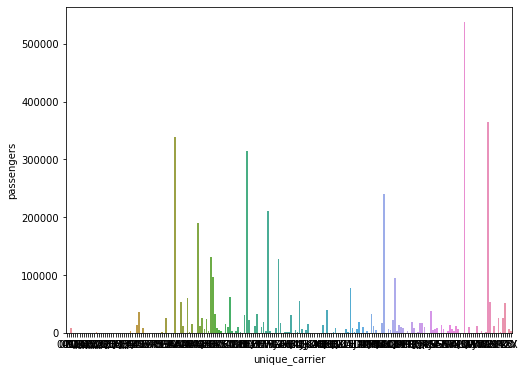

In [132]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x='unique_carrier', y="passengers", data=pass_carrier_wise)

<AxesSubplot:xlabel='unique_carrier'>

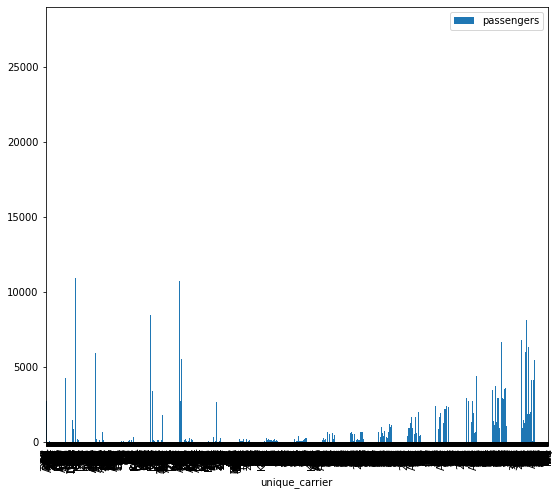

In [127]:
df_passenger4000.plot(x='unique_carrier', y='passengers', kind="bar", figsize=(9, 8))

<AxesSubplot:xlabel='month'>

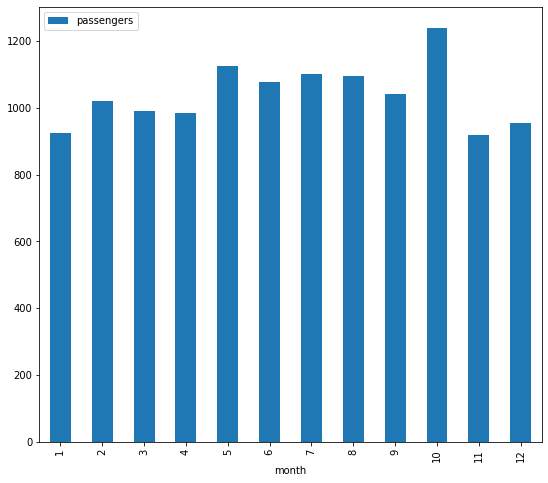

In [74]:
passenger_per_month.plot(x='month', y='passengers', kind="bar", figsize=(9, 8))

# Distance covered monthly by different air carriers

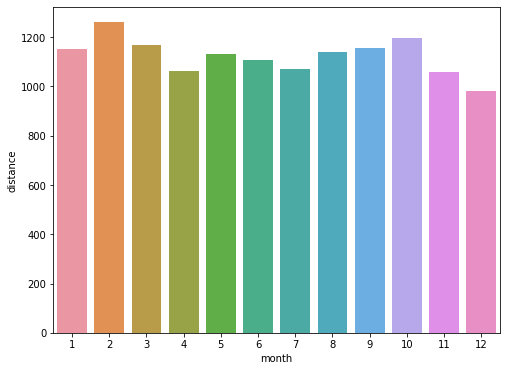

In [78]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x='month', y="distance", data=passenger_per_month)

In [104]:
distance_carrier = df_passenger4000[['month','unique_carrier','distance']].groupby(['month','unique_carrier']).sum().reset_index()
#monthly_pass_carrier = monthly_pass_carrier[['unique_carrier','passengers']].groupby('unique_carrier').mean().reset_index()

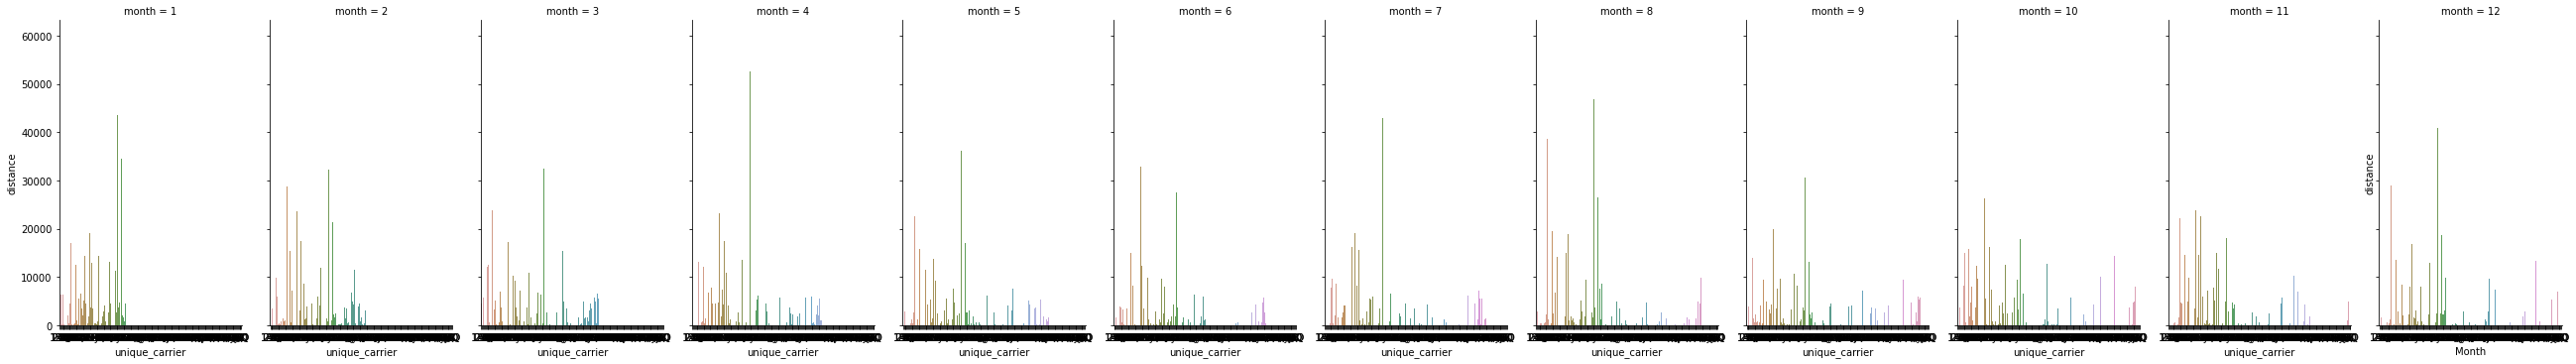

In [106]:
g1= sns.catplot(x="unique_carrier", y="distance", col="month",data=distance_carrier, saturation=.5,kind="bar", ci=None, aspect=.6)

plt.xlabel("Month")
plt.ylabel("distance")
plt.show()
g1.savefig("distance.png")

# Total fuel comsumption per air carrier

In [45]:
df_fuel_consumption.head()

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,5100,0.0,5100,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,396216,140239.0,536455,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405,0.0,0.0,0.0,0.0,522405,569497,0.0,569497,2016


In [46]:
df_fuel_consumption.isnull().sum()

month                0
airline_id           1
unique_carrier       1
carrier              0
carrier_name         1
carrier_group_new    0
sdomt_gallons        1
satl_gallons         1
spac_gallons         1
slat_gallons         2
sint_gallons         1
ts_gallons           1
tdomt_gallons        3
tint_gallons         1
total_gallons        6
sdomt_cost           0
satl_cost            1
spac_cost            1
slat_cost            1
sint_cost            1
ts_cost              0
tdomt_cost           0
tint_cost            1
total_cost           0
year                 0
dtype: int64

In [49]:
df_fuel_consumption.dropna(axis=0,inplace=True)

In [50]:
df_fuel_consumption.shape

(3025, 25)

In [51]:
df_fuel_consumption.columns

Index(['month', 'airline_id', 'unique_carrier', 'carrier', 'carrier_name',
       'carrier_group_new', 'sdomt_gallons', 'satl_gallons', 'spac_gallons',
       'slat_gallons', 'sint_gallons', 'ts_gallons', 'tdomt_gallons',
       'tint_gallons', 'total_gallons', 'sdomt_cost', 'satl_cost', 'spac_cost',
       'slat_cost', 'sint_cost', 'ts_cost', 'tdomt_cost', 'tint_cost',
       'total_cost', 'year'],
      dtype='object')

In [56]:
df_fuel_consumption.unique_carrier.value_counts()

0WQ    57
PFQ    57
KAQ    57
KH     57
KLQ    57
       ..
2HQ    19
3EQ    12
0JQ     9
US      6
FCQ     3
Name: unique_carrier, Length: 62, dtype: int64

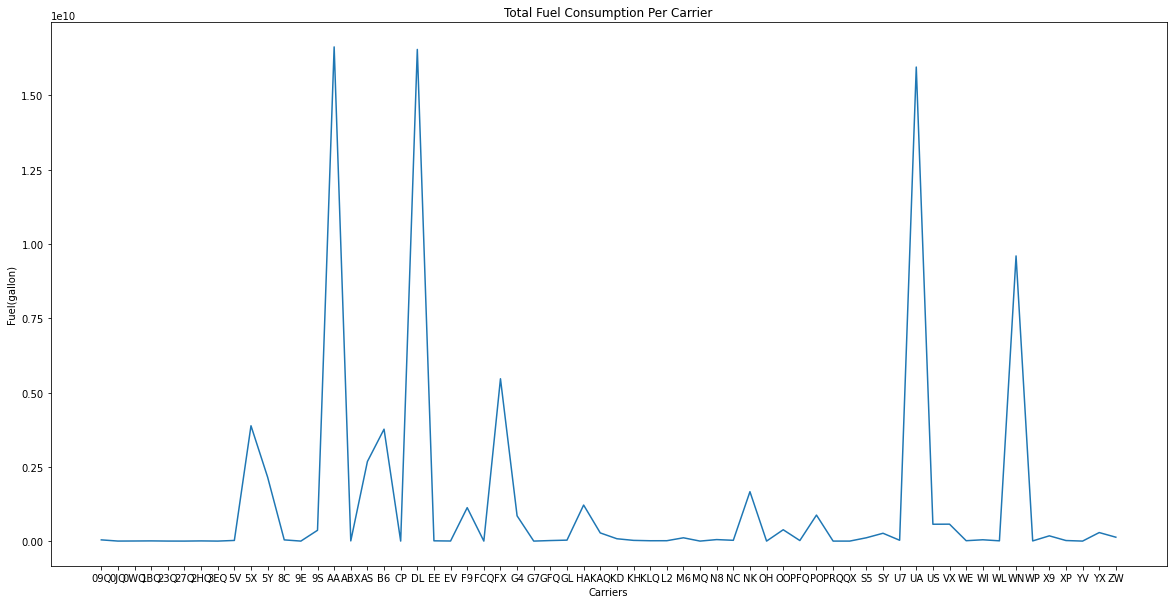

In [166]:
fuel_consump_per_carrier = df_fuel_consumption.groupby('unique_carrier')['total_gallons'].sum()
fig, axes = plt.subplots(figsize=(20, 10))
sns.lineplot(ax=axes, x=fuel_consump_per_carrier.index, y=fuel_consump_per_carrier.values)
axes.set_title('Total Fuel Consumption Per Carrier')
axes.set_xlabel('Carriers')
axes.set_ylabel('Fuel(gallon)')
plt.show()